# P52 统计图形实战

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('E:\云开见明\云开见明Python数据分析师课程数据（仅与云开见明Python数据分析师配套）\第四章')

In [2]:
# 支持中文显示
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [3]:
gdp = pd.read_excel('Province GDP 2017.xlsx')

In [4]:
gdp

,Province,GDP
0,北京,2.80
1,上海,3.01
2,广东,8.99
3,江苏,8.59
4,重庆,1.95
5,天津,1.86


In [5]:
gdp.Province.values

array(['北京', '上海', '广东', '江苏', '重庆', '天津'], dtype=object)

In [6]:
gdp.index.values

array([0, 1, 2, 3, 4, 5], dtype=int64)

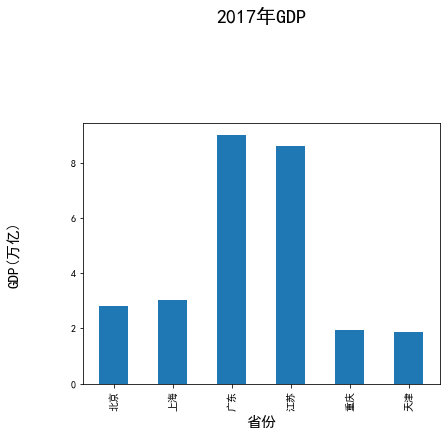

In [7]:
plt.figure(figsize=[6.4,4.8]) #规定画布大小
plt.bar(x=gdp.index.values,height=gdp.GDP,width=0.5)
        #tick_label=gdp.Province.values

# x轴标签
plt.xticks(gdp.index.values,gdp.Province,rotation=90) #rotation:旋转
plt.xlabel('省份',fontsize=15)
plt.ylabel('GDP(万亿)',fontsize=15,labelpad=50) #labepad:距离
plt.title('2017年GDP',fontsize=20,pad=100)      #pad:距离
plt.show()

堆叠柱状图

In [8]:
# 堆叠柱状图
industry_gdp=pd.read_excel('Industry_GDP.xlsx')

In [9]:
industry_gdp

,Quarter,Industry_Type,GDP
0,Q1,第一产业,8654.0
1,Q2,第一产业,13333.0
2,Q3,第一产业,19242.1
3,Q4,第一产业,24238.5
4,Q1,第二产业,70084.4
5,Q2,第二产业,83128.5
6,Q3,第二产业,85232.9
7,Q4,第二产业,96176.7
8,Q1,第三产业,101646.9
9,Q2,第三产业,104097.2


In [10]:
pd.pivot_table?

In [11]:
temp = pd.pivot_table(data=industry_gdp,index='Quarter',columns='Industry_Type',
                      values='GDP',aggfunc=np.sum)

In [12]:
temp

Industry_Type,第一产业,第三产业,第二产业
Quarter,,,
Q1,8654.0,101646.9,70084.4
Q2,13333.0,104097.2,83128.5
Q3,19242.1,107120.5,85232.9
Q4,24238.5,114167.0,96176.7


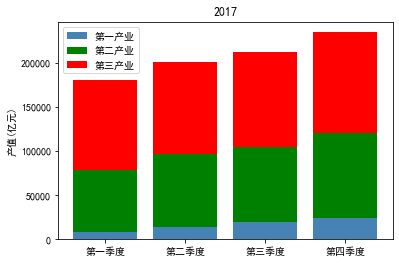

In [13]:
# bottom:底部
plt.bar(x=temp.index.values,
        height=temp['第一产业'],
        color='steelblue',
       label='第一产业',
        tick_label=['第一季度','第二季度','第三季度','第四季度'])
plt.bar(x=temp.index.values,
        height=temp['第二产业'],
        color='g',
       label='第二产业',
        bottom=temp['第一产业'],
        tick_label=['第一季度','第二季度','第三季度','第四季度'])
plt.bar(x=temp.index.values,
        height=temp['第三产业'],
        color='r',
       label='第三产业',
        bottom=temp['第一产业'] + temp['第二产业'],
        tick_label=['第一季度','第二季度','第三季度','第四季度'])
plt.ylabel('产值(亿元)')
plt.title('2017')
plt.legend()
plt.show()

In [14]:
industry_gdp

,Quarter,Industry_Type,GDP
0,Q1,第一产业,8654.0
1,Q2,第一产业,13333.0
2,Q3,第一产业,19242.1
3,Q4,第一产业,24238.5
4,Q1,第二产业,70084.4
5,Q2,第二产业,83128.5
6,Q3,第二产业,85232.9
7,Q4,第二产业,96176.7
8,Q1,第三产业,101646.9
9,Q2,第三产业,104097.2


In [15]:
temp = pd.crosstab(industry_gdp['Quarter'],
                   industry_gdp['Industry_Type'],
                  values=industry_gdp['GDP'],
                   aggfunc=np.sum,normalize='index')

In [16]:
temp

Industry_Type,第一产业,第三产业,第二产业
Quarter,,,
Q1,0.047975,0.563499,0.388526
Q2,0.066479,0.519036,0.414485
Q3,0.090938,0.506251,0.402811
Q4,0.103326,0.486682,0.409991


比率作图

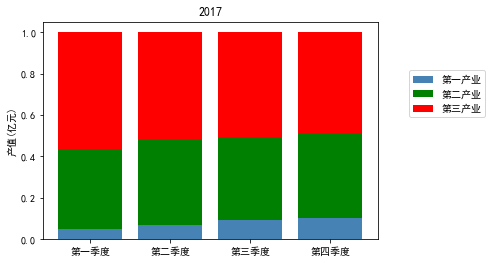

In [17]:
# 比率作图
plt.bar(x=temp.index.values,
        height=temp['第一产业'],
        color='steelblue',
       label='第一产业',
        tick_label=['第一季度','第二季度','第三季度','第四季度'])
plt.bar(x=temp.index.values,
        height=temp['第二产业'],
        color='g',
       label='第二产业',
        bottom=temp['第一产业'],
        tick_label=['第一季度','第二季度','第三季度','第四季度'])
plt.bar(x=temp.index.values,
        height=temp['第三产业'],
        color='r',
       label='第三产业',
        bottom=temp['第一产业'] + temp['第二产业'],
        tick_label=['第一季度','第二季度','第三季度','第四季度'])
plt.ylabel('产值(亿元)')
plt.title('2017') 
                         #（x,y) x:距离y轴距离，y:距离y轴距离
plt.legend(bbox_to_anchor=(1.08,0.8)) #调整图例位置
plt.show()

# P53

直方图

In [18]:
# 直方图
titanic = pd.read_csv('titanic_train.csv')

In [19]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [20]:
# 删除年龄为空的指
titanic.dropna(subset=['Age'],inplace=True)

In [21]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


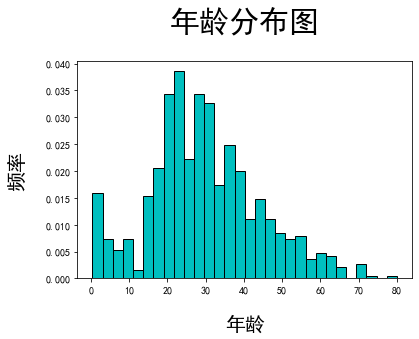

In [22]:
plt.hist(x=titanic['Age'],
        bins=30,
        color='c',
        edgecolor='black',
        density=True) #density:以频率显示
plt.xlabel('年龄',fontsize=20,labelpad=20) #fontsize:字体大小，labelpad:距离
plt.ylabel('频率',fontsize=20,labelpad=20)
plt.title('年龄分布图',fontsize=30,pad=30)
plt.show()

正态分布公式

In [23]:
# 正态分布公式
def normfun(x,mu,sigma):
    pdf=np.exp(-((x-mu)**2)/(2*sigma*2)) / (sigma*np.sqrt(2*np.pi))
    return pdf

In [24]:
mean_x=titanic['Age'].mean()
std_x=titanic['Age'].std()

In [25]:
x=np.arange(titanic['Age'].min(),titanic['Age'].max()+10,1)

In [26]:
x

array([ 0.42,  1.42,  2.42,  3.42,  4.42,  5.42,  6.42,  7.42,  8.42,
        9.42, 10.42, 11.42, 12.42, 13.42, 14.42, 15.42, 16.42, 17.42,
       18.42, 19.42, 20.42, 21.42, 22.42, 23.42, 24.42, 25.42, 26.42,
       27.42, 28.42, 29.42, 30.42, 31.42, 32.42, 33.42, 34.42, 35.42,
       36.42, 37.42, 38.42, 39.42, 40.42, 41.42, 42.42, 43.42, 44.42,
       45.42, 46.42, 47.42, 48.42, 49.42, 50.42, 51.42, 52.42, 53.42,
       54.42, 55.42, 56.42, 57.42, 58.42, 59.42, 60.42, 61.42, 62.42,
       63.42, 64.42, 65.42, 66.42, 67.42, 68.42, 69.42, 70.42, 71.42,
       72.42, 73.42, 74.42, 75.42, 76.42, 77.42, 78.42, 79.42, 80.42,
       81.42, 82.42, 83.42, 84.42, 85.42, 86.42, 87.42, 88.42, 89.42])

In [27]:
y=normfun(x,mean_x,std_x)

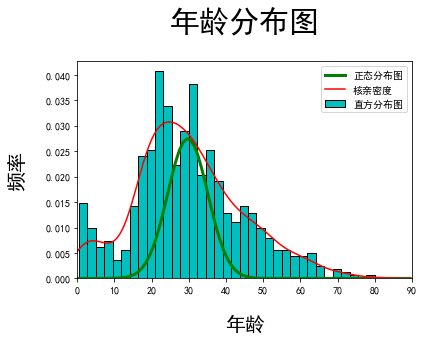

In [28]:
plt.hist(x=titanic['Age'],
        bins=35,
        color='c',
        edgecolor='black',
        density=True,
        label='直方分布图') #density:以频率显示
plt.plot(x,y,color='g',linewidth=3,label='正态分布图')
titanic['Age'].plot(kind='kde',color='r',xlim=[0,90],label='核亲密度')
plt.xlabel('年龄',fontsize=20,labelpad=20) #fontsize:字体大小，labelpad:距离
plt.ylabel('频率',fontsize=20,labelpad=20)
plt.title('年龄分布图',fontsize=30,pad=30)
plt.legend()
plt.show()

箱线图

In [29]:
# 箱线图
sec_build=pd.read_excel('sec_buildings.xlsx')

In [30]:
sec_build

,block,type,size,region,height,direction,price,built_date,price_unit
0,梅园六街坊,2室0厅,47.72,浦东,低区/6层,朝南,500,1992年建,104777
1,碧云新天地（一期）,3室2厅,108.93,浦东,低区/6层,朝南,735,2002年建,67474
2,博山小区,1室1厅,43.79,浦东,中区/6层,朝南,260,1988年建,59374
3,金桥新村四街坊（博兴路986弄）,1室1厅,41.66,浦东,中区/6层,朝南北,280,1997年建,67210
4,博山小区,1室0厅,39.77,浦东,高区/6层,朝南,235,1987年建,59089
...,...,...,...,...,...,...,...,...,...
20270,棕榈湾花园,3室2厅,118.31,金山,低区/6层,朝南,330,2004年建,27892
20271,绿舟星城,3室2厅,102.77,崇明,低区/6层,朝南,180,2011年建,17514
20272,明珠花苑（崇明）,2室2厅,101.59,崇明,中区/6层,朝南北,205,2004年建,20179
20273,凤辰乐苑,2室1厅,81.43,崇明,高区/6层,朝南北,210,2008年建,25789


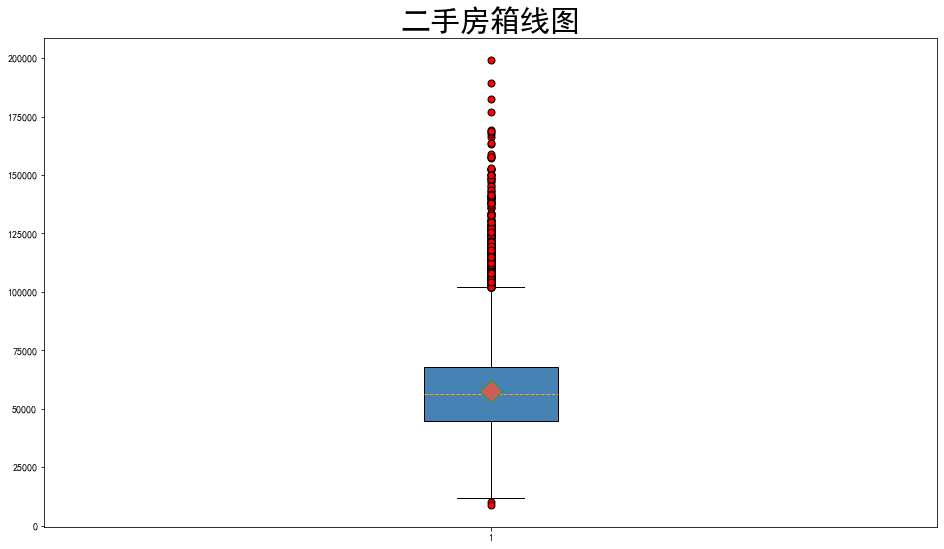

In [31]:
plt.figure(figsize=(16,9))  #画布大小
plt.boxplot(x=sec_build['price_unit'],
            patch_artist=True,  #是否填充箱体颜色
           showmeans=True,      #是否显示均值
           showfliers=True,     #是否表示有异常值
           boxprops={'color':'black','facecolor':'steelblue'},
            #设置箱体的属性，边框色和填充色
           flierprops={'marker':'o','markerfacecolor':'red','markersize':7},
            #设置异常值的属性，点的形状，点的填充色，点的大小
           meanprops={'marker':'D','markerfacecolor':'indianred','markersize':15},
            #设置均值的属性，填充色，大小
            medianprops={'linestyle':'--','color':'orange'})
            #设置中位数的属性，线的类型，大小
plt.title('二手房箱线图',fontsize=30)
plt.show()

# P54 散点图

散点图

In [32]:
iris=pd.read_csv('iris.csv')

In [33]:
iris

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


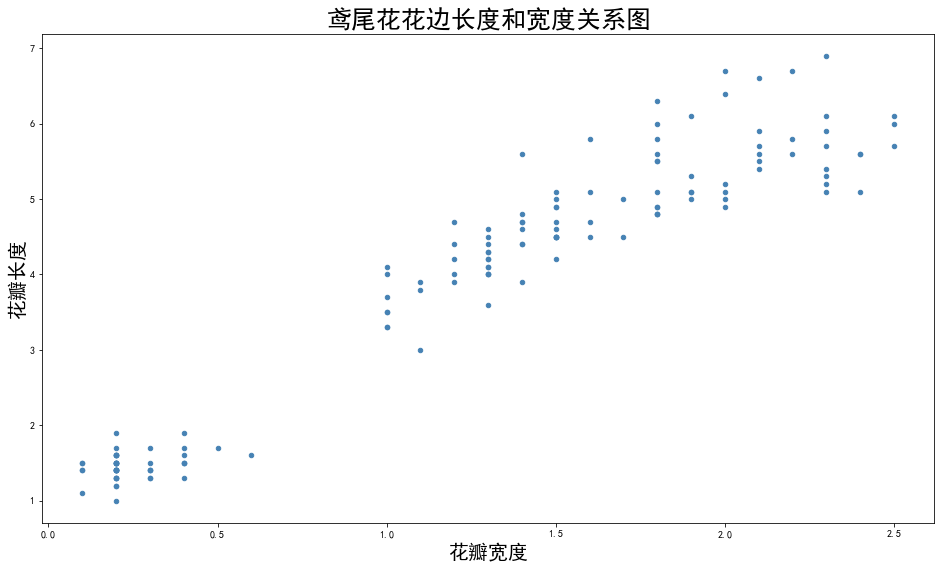

In [34]:
plt.figure(figsize=(16,9))
plt.scatter(x=iris.Petal_Width,
           y=iris.Petal_Length,
           s=20, #点的大小
           color='steelblue')
plt.xlabel('花瓣宽度',fontsize=20)
plt.ylabel('花瓣长度',fontsize=20)
plt.title('鸢尾花花边长度和宽度关系图',fontsize=25)
plt.show()

In [35]:
iris['Species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object

In [36]:
iris['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [37]:
colors_iris=['steelblue','indianred','green']
species=['setosa','versicolor','virginica']
marker_iris=['o','s','x']

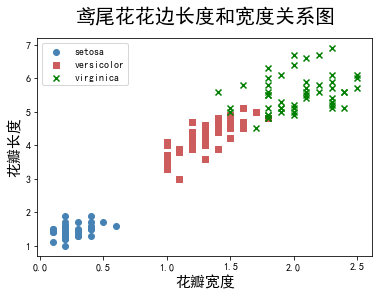

In [38]:
# 画三张叠一起
for i in range(0,3):
    plt.scatter(x=iris.Petal_Width[iris['Species']==species[i]],
               y=iris.Petal_Length[iris['Species']==species[i]],
               color=colors_iris[i],
               marker=marker_iris[i],
               label=species[i])
plt.xlabel('花瓣宽度',fontsize=15)
plt.ylabel('花瓣长度',fontsize=15)
plt.title('鸢尾花花边长度和宽度关系图',fontsize=20,pad=15)
plt.legend()
plt.show()

折线图

In [39]:
# 折线图
data=pd.read_excel('国民经济核算季度数据.xlsx')

In [40]:
data

,序号,时间,国内生产总值_当季值(亿元),第一产业增加值_当季值(亿元),第二产业增加值_当季值(亿元),第三产业增加值_当季值(亿元),农林牧渔业增加值_当季值(亿元),工业增加值_当季值(亿元),建筑业增加值_当季值(亿元),批发和零售业增加值_当季值(亿元),交通运输、仓储和邮政业增加值_当季值(亿元),住宿和餐饮业增加值_当季值(亿元),金融业增加值_当季值(亿元),房地产业增加值_当季值(亿元),其他行业增加值_当季值(亿元)
0,1,2000年第一季度,21329.9,1908.3,9548.0,9873.6,1947.5,8798.7,777.1,2100.9,1379.4,570.5,1235.9,933.7,3586.1
1,2,2000年第二季度,24043.4,3158.2,11127.5,9757.7,3209.7,9799.9,1359.0,2073.0,1571.7,536.5,1124.0,904.7,3464.9
2,3,2000年第三季度,25712.5,4140.6,11887.0,9684.9,4196.1,10503.1,1417.4,1943.2,1370.0,523.2,1170.4,1070.9,3518.2
3,4,2000年第四季度,29194.3,5510.2,13102.3,10581.7,5590.2,11158.0,1980.5,2041.5,1840.8,516.1,1306.0,1239.7,3521.5
4,5,2001年第一季度,24086.4,2015.3,10641.7,11429.4,2061.6,9838.3,834.2,2351.6,1604.1,638.6,1341.5,1074.4,4342.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,65,2016年第一季度,161572.7,8803.0,61325.0,91444.7,9153.0,54110.2,7465.0,16265.6,7284.0,3105.7,15777.7,10965.1,37446.4
65,66,2016年第二季度,180743.7,13293.7,73652.7,93797.3,13779.4,61490.1,12447.0,17038.1,8322.7,3037.5,15333.5,11788.6,37506.9
66,67,2016年第三季度,190529.5,18569.0,75556.9,96403.7,19184.0,62507.7,13338.2,17850.4,8658.9,3389.6,15472.5,12164.1,37964.1
67,68,2016年第四季度,211281.3,23005.0,85701.5,102574.8,23848.0,69752.1,16272.0,19959.3,9089.8,3748.0,15548.7,13214.9,39848.4


In [41]:
data.iloc[range(0,70,4),1]

0     2000年第一季度
4     2001年第一季度
8     2002年第一季度
12    2003年第一季度
16    2004年第一季度
20    2005年第一季度
24    2006年第一季度
28    2007年第一季度
32    2008年第一季度
36    2009年第一季度
40    2010年第一季度
44    2011年第一季度
48    2012年第一季度
52    2013年第一季度
56    2014年第一季度
60    2015年第一季度
64    2016年第一季度
68    2017年第一季度
Name: 时间, dtype: object

In [42]:
# 取年份
year=[x[:5] for x in data.iloc[range(0,70,4),1]]

In [43]:
year

['2000年',
 '2001年',
 '2002年',
 '2003年',
 '2004年',
 '2005年',
 '2006年',
 '2007年',
 '2008年',
 '2009年',
 '2010年',
 '2011年',
 '2012年',
 '2013年',
 '2014年',
 '2015年',
 '2016年',
 '2017年']

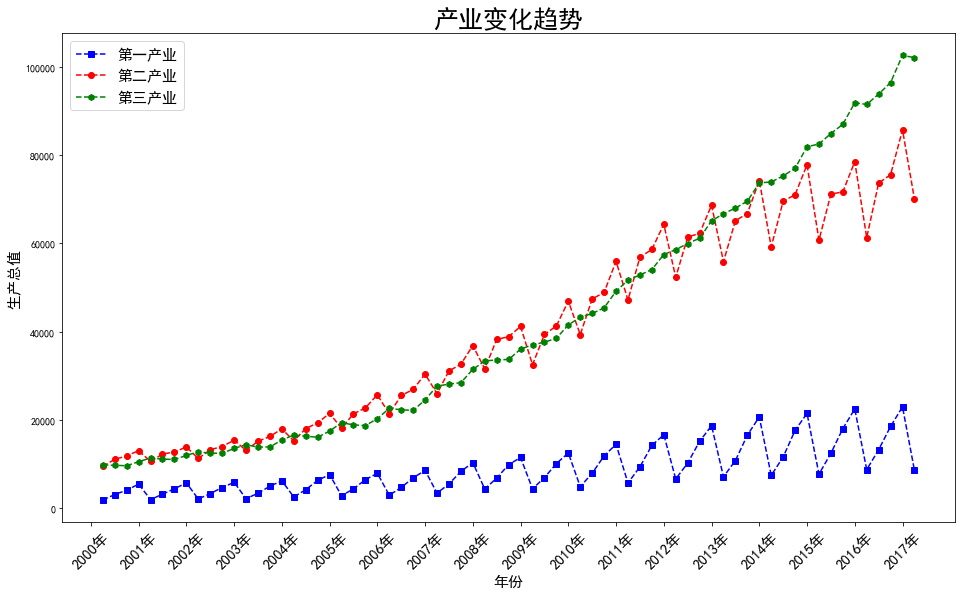

In [44]:
plt.figure(figsize=(16,9))
plt.plot(#第一幅图
        data.iloc[:,0],
        data.iloc[:,3],
        'bs--', #color:blue,marker:s,ls=--
        #第二幅图
        data.iloc[:,0],
        data.iloc[:,4],
        'ro--',
        #第三幅图
        data.iloc[:,0],
        data.iloc[:,5],
        'gh--')
plt.xlabel('年份',fontsize=15)
plt.ylabel('生产总值',fontsize=15)
plt.xticks(range(0,70,4),#分块
           year,
           rotation=45,
           fontsize=15)
plt.legend(['第一产业','第二产业','第三产业'],fontsize=15)
plt.title('产业变化趋势',fontsize=25)
plt.show()

# P55 完善统计图形

legend()

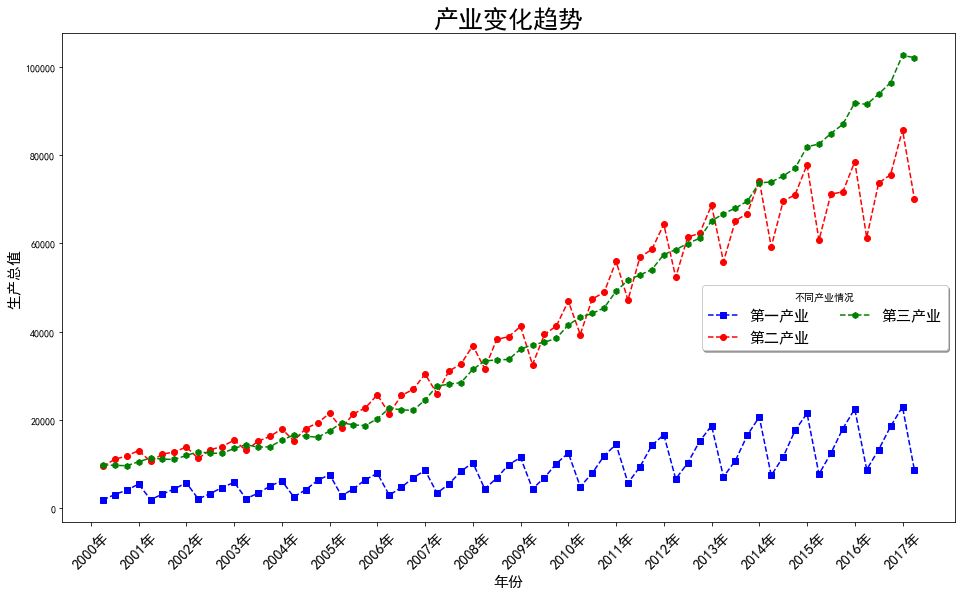

In [45]:
# legend() - 图例的使用
plt.figure(figsize=(16,9))
plt.plot(data.iloc[:,0],data.iloc[:,3],'bs--',data.iloc[:,0],data.iloc[:,4],'ro--',data.iloc[:,0],data.iloc[:,5],'gh--')
plt.xlabel('年份',fontsize=15)
plt.ylabel('生产总值',fontsize=15)
plt.xticks(range(0,70,4),year,rotation=45,fontsize=15)

plt.legend(['第一产业','第二产业','第三产业'],fontsize=15,
          bbox_to_anchor=(1,0.5),#移动图例
          ncol=2,                #ncol:图例排列个数
          title='不同产业情况',  #图例标题
          shadow=True           #是否添加阴影
) 
plt.title('产业变化趋势',fontsize=25)
plt.show()

In [46]:
plt.legend?

fig=plt.figure()\
fig.add_axes()

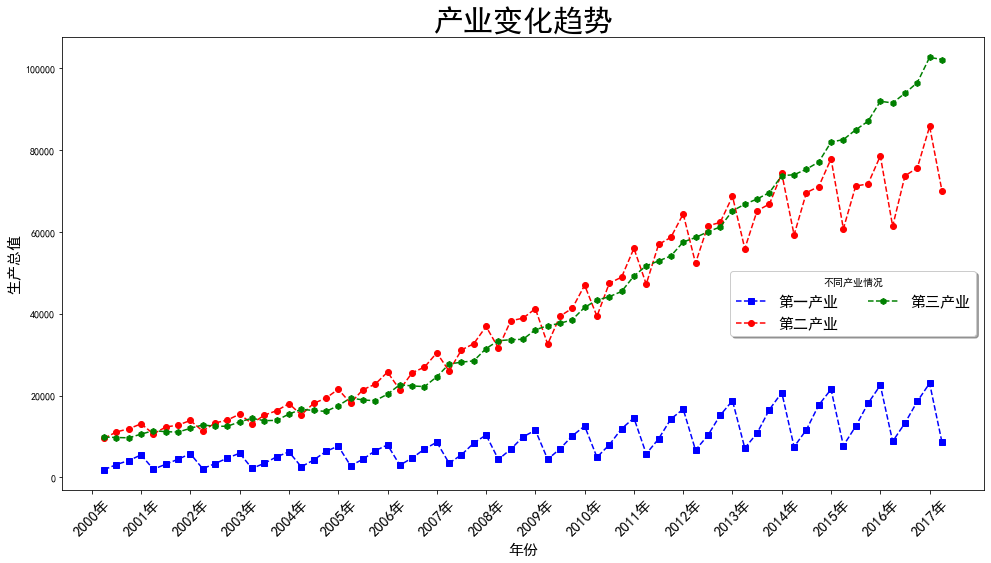

In [47]:
# 画布的使用
# fig=plt.figure(),创建画布
# fig.add_axes([a,b,c,d])
# a:距离最左边距离，b:距离最下面距离，c:宽度，d:高度
fig = plt.figure(figsize=(16,9))
fig.add_axes([0.2,0.15,0.8,0.7])

plt.plot(data.iloc[:,0],data.iloc[:,3],'bs--',data.iloc[:,0],data.iloc[:,4],'ro--',data.iloc[:,0],data.iloc[:,5],'gh--')
plt.xlabel('年份',fontsize=15)
plt.ylabel('生产总值',fontsize=15)
plt.xticks(range(0,70,4),year,rotation=45,fontsize=15)
plt.legend(['第一产业','第二产业','第三产业'],fontsize=15,bbox_to_anchor=(1,0.5),ncol=2,title='不同产业情况',shadow=True) 
plt.title('产业变化趋势',size=30)
plt.show()

plt.title()

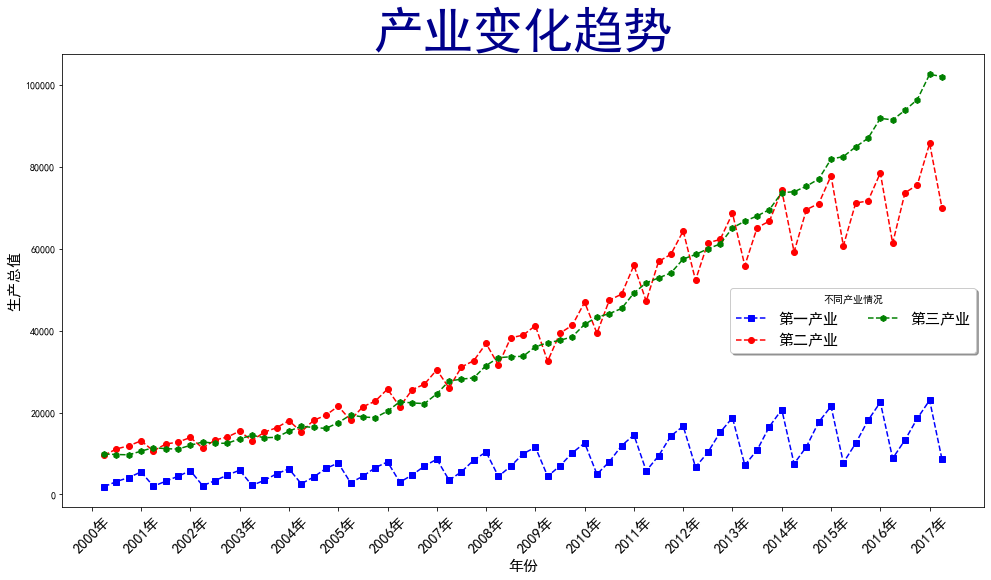

In [48]:
fig = plt.figure(figsize=(16,9))
fig.add_axes([0.2,0.15,0.8,0.7])
plt.plot(data.iloc[:,0],data.iloc[:,3],'bs--',data.iloc[:,0],data.iloc[:,4],'ro--',data.iloc[:,0],data.iloc[:,5],'gh--')
plt.xlabel('年份',fontsize=15)
plt.ylabel('生产总值',fontsize=15)
plt.xticks(range(0,70,4),year,rotation=45,fontsize=15)
plt.legend(['第一产业','第二产业','第三产业'],fontsize=15,bbox_to_anchor=(1,0.5),ncol=2,title='不同产业情况',shadow=True)

plt.title('产业变化趋势',size=50,color='darkblue')
plt.show()

调整刻度轴

In [49]:
prod_trade=pd.read_excel('Prod_Trade.xlsx')

In [50]:
prod_trade

,Date,Order_Class,Sales,Transport,Trans_Cost,Region,Category,Box_Type
0,2010-10-13,低级,261.5400,火车,35.00,华北,办公用品,大型箱子
1,2012-02-20,其它,6.0000,火车,2.56,华南,办公用品,小型包裹
2,2011-07-15,高级,2808.0800,火车,5.81,华南,家具产品,中型箱子
3,2011-07-15,高级,1761.4000,大卡,89.30,华北,家具产品,巨型纸箱
4,2011-07-15,高级,160.2335,火车,5.03,华北,技术产品,中型箱子
...,...,...,...,...,...,...,...,...
8563,2012-11-15,高级,18.9100,火车,7.01,华东,办公用品,小型箱子
8564,2012-11-15,高级,685.7000,火车,20.79,华南,家具产品,大型箱子
8565,2012-11-15,高级,1024.1650,火车,5.99,华南,技术产品,小型箱子
8566,2009-01-23,中级,1383.2000,火车,12.14,华南,技术产品,小型箱子


In [51]:
data_1=prod_trade.groupby('Date').mean()

In [52]:
data_1

,Sales,Trans_Cost
Date,,
2009-01-01,526.420000,19.845000
2009-01-02,1850.311667,17.996667
2009-01-03,3199.785550,14.392000
2009-01-04,418.083333,12.733333
2009-01-05,2648.960267,16.280000
...,...,...
2012-12-26,175.705000,1.935000
2012-12-27,3017.071643,16.818571
2012-12-28,907.060000,11.823333


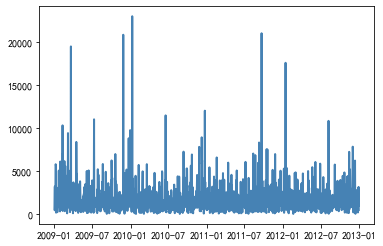

In [53]:
plt.plot(data_1.index,
        data_1['Sales'],
        linestyle='-',
        linewidth=2,
        color='steelblue')

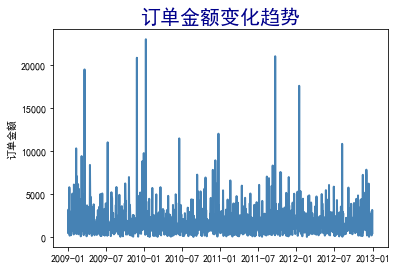

In [54]:
plt.plot(data_1.index,
        data_1['Sales'],
        linestyle='-',
        linewidth=2,
        color='steelblue')
plt.ylabel('订单金额')
plt.title('订单金额变化趋势',size=20,color='darkblue')
plt.show()

更改坐标轴

In [55]:
mpl.dates.DateFormatter?

Object `mpl.dates.DateFormatter` not found.


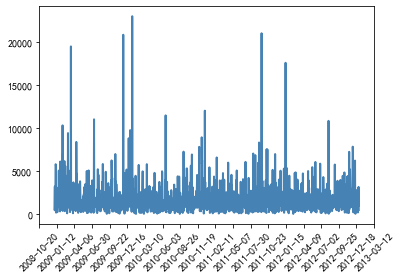

In [56]:
# 坐标轴
import matplotlib as mpl

# 关键
# plt.gac():挪动坐标轴
ax = plt.gca()
date_format=mpl.dates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_format)#设置坐标轴格式为年月日
xlocator=mpl.ticker.LinearLocator(20)    #显示多少个日期
ax.xaxis.set_major_locator(xlocator)     #放入坐标轴
  
plt.plot(data_1.index,
        data_1['Sales'],
        linestyle='-',
        linewidth=2,
        color='steelblue')
plt.xticks(rotation=45)
plt.show()

图形添加内容

In [57]:
gdp

,Province,GDP
0,北京,2.80
1,上海,3.01
2,广东,8.99
3,江苏,8.59
4,重庆,1.95
5,天津,1.86


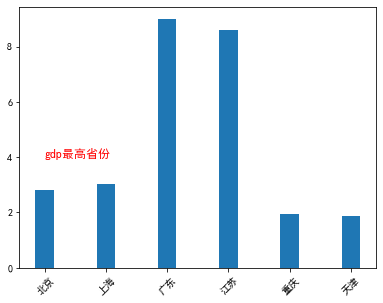

In [58]:
# 无指向型
plt.figure(figsize=(6.4,4.8))
plt.bar(x=gdp.index.values,
       height=gdp.GDP,
       align='center', #柱子在x轴上的对齐方式,取值范围为{'center', 'edge'}，默认为'center'。
       tick_label=gdp.Province,
       width=0.3)
plt.xticks(rotation=45)

# 添加图形细节的无指向型注释文本
plt.text(0,4,  #x,y：坐标位置
         'gdp最高省份', #内容
         weight='bold', #注释文本字体粗细风格
        color='red',    #颜色
        fontsize=12)    #字体大小

plt.show()

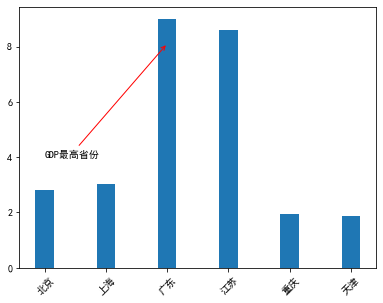

In [59]:
# 有指向性
plt.figure(figsize=(6.4,4.8))
plt.bar(x=gdp.index.values,
       height=gdp.GDP,
       align='center', #柱子在x轴上的对齐方式,取值范围为{'center', 'edge'}，默认为'center'。
       tick_label=gdp.Province,
       width=0.3)
plt.xticks(rotation=45)

# 添加图形细节的有指向型注释文本
# annotate：注释
plt.annotate('GDP最高省份', #字符串注释
            xy=(2,8.1),     #被注释图形内容的位置坐标，即箭头指向位置
            xytext=(0,4),   #注释文本的位置坐标
            color='black',
             #arrowprops:指示被注释内容的箭头的属性字典
            arrowprops=dict(arrowstyle='->',  #箭头样式
                            connectionstyle='arc3', #连接方式{arc3,angle3}
                           color='red'))

plt.show()

# P57 图形样式高级操作

绘制双坐标轴

In [60]:
# 绘制双坐标轴
prod_trade

,Date,Order_Class,Sales,Transport,Trans_Cost,Region,Category,Box_Type
0,2010-10-13,低级,261.5400,火车,35.00,华北,办公用品,大型箱子
1,2012-02-20,其它,6.0000,火车,2.56,华南,办公用品,小型包裹
2,2011-07-15,高级,2808.0800,火车,5.81,华南,家具产品,中型箱子
3,2011-07-15,高级,1761.4000,大卡,89.30,华北,家具产品,巨型纸箱
4,2011-07-15,高级,160.2335,火车,5.03,华北,技术产品,中型箱子
...,...,...,...,...,...,...,...,...
8563,2012-11-15,高级,18.9100,火车,7.01,华东,办公用品,小型箱子
8564,2012-11-15,高级,685.7000,火车,20.79,华南,家具产品,大型箱子
8565,2012-11-15,高级,1024.1650,火车,5.99,华南,技术产品,小型箱子
8566,2009-01-23,中级,1383.2000,火车,12.14,华南,技术产品,小型箱子


In [61]:
data_2=prod_trade.groupby('Region').mean()

In [62]:
data_2

,Sales,Trans_Cost
Region,,
东北,1756.984094,13.029785
华东,1747.487949,12.648524
华北,1803.506256,12.945072
华南,1776.521742,12.675480
西北,1666.225981,13.756375
西南,1896.926680,13.392840


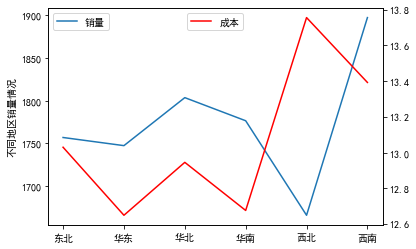

In [63]:
fig_1=plt.figure()
ax1=fig_1.add_subplot(111) #一行一列第一个位置
ax1.plot(data_2.index,
        data_2.Sales,
        label='销量')
ax1.set_ylabel('不同地区销量情况')
plt.legend()
ax2=ax1.twinx() #关键
ax2.plot(data_2.index,
        data_2.Trans_Cost,
        color='red',
        label='成本')
plt.legend(loc='upper center')
plt.show()

多图形合并\
.一般使用subplot函数\
.更加高级的可以使用subplot2grid

In [64]:
# 多图形合并

gdp #Province GDP 2017.xlsx
titanic #titanic_train.csv
data #国民经济核算季度数据.xlsx

,序号,时间,国内生产总值_当季值(亿元),第一产业增加值_当季值(亿元),第二产业增加值_当季值(亿元),第三产业增加值_当季值(亿元),农林牧渔业增加值_当季值(亿元),工业增加值_当季值(亿元),建筑业增加值_当季值(亿元),批发和零售业增加值_当季值(亿元),交通运输、仓储和邮政业增加值_当季值(亿元),住宿和餐饮业增加值_当季值(亿元),金融业增加值_当季值(亿元),房地产业增加值_当季值(亿元),其他行业增加值_当季值(亿元)
0,1,2000年第一季度,21329.9,1908.3,9548.0,9873.6,1947.5,8798.7,777.1,2100.9,1379.4,570.5,1235.9,933.7,3586.1
1,2,2000年第二季度,24043.4,3158.2,11127.5,9757.7,3209.7,9799.9,1359.0,2073.0,1571.7,536.5,1124.0,904.7,3464.9
2,3,2000年第三季度,25712.5,4140.6,11887.0,9684.9,4196.1,10503.1,1417.4,1943.2,1370.0,523.2,1170.4,1070.9,3518.2
3,4,2000年第四季度,29194.3,5510.2,13102.3,10581.7,5590.2,11158.0,1980.5,2041.5,1840.8,516.1,1306.0,1239.7,3521.5
4,5,2001年第一季度,24086.4,2015.3,10641.7,11429.4,2061.6,9838.3,834.2,2351.6,1604.1,638.6,1341.5,1074.4,4342.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,65,2016年第一季度,161572.7,8803.0,61325.0,91444.7,9153.0,54110.2,7465.0,16265.6,7284.0,3105.7,15777.7,10965.1,37446.4
65,66,2016年第二季度,180743.7,13293.7,73652.7,93797.3,13779.4,61490.1,12447.0,17038.1,8322.7,3037.5,15333.5,11788.6,37506.9
66,67,2016年第三季度,190529.5,18569.0,75556.9,96403.7,19184.0,62507.7,13338.2,17850.4,8658.9,3389.6,15472.5,12164.1,37964.1
67,68,2016年第四季度,211281.3,23005.0,85701.5,102574.8,23848.0,69752.1,16272.0,19959.3,9089.8,3748.0,15548.7,13214.9,39848.4


In [65]:
gdp #Province GDP 2017.xlsx

,Province,GDP
0,北京,2.80
1,上海,3.01
2,广东,8.99
3,江苏,8.59
4,重庆,1.95
5,天津,1.86


In [66]:
titanic #titanic_train.csv

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [67]:
# 删除年龄为空的值
titanic.dropna(subset=['Age'],inplace=True)

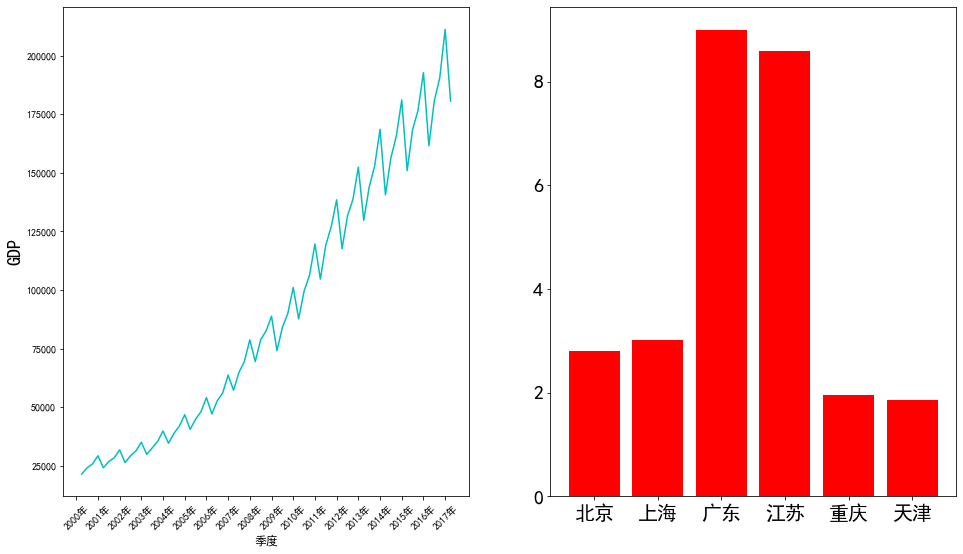

In [70]:
plt.figure(figsize=(16,9))
plt.subplot(121) #一行两列第一个位置
plt.plot(data['序号'],
         data['国内生产总值_当季值(亿元)'],
        color='c')
plt.xlabel('季度',fontsize=12)
plt.ylabel('GDP',fontsize=18)
plt.xticks(range(0,70,4),year,rotation=45)

# 第二幅
plt.subplot(122)#一行两列第二个位置
plt.bar(x=gdp.Province,
        height=gdp.GDP,
       color='r')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

subplot2gird应用\
subplot2grid函数可以让子区跨越固定的网格布局的多个行和列，实现不同的子区布局

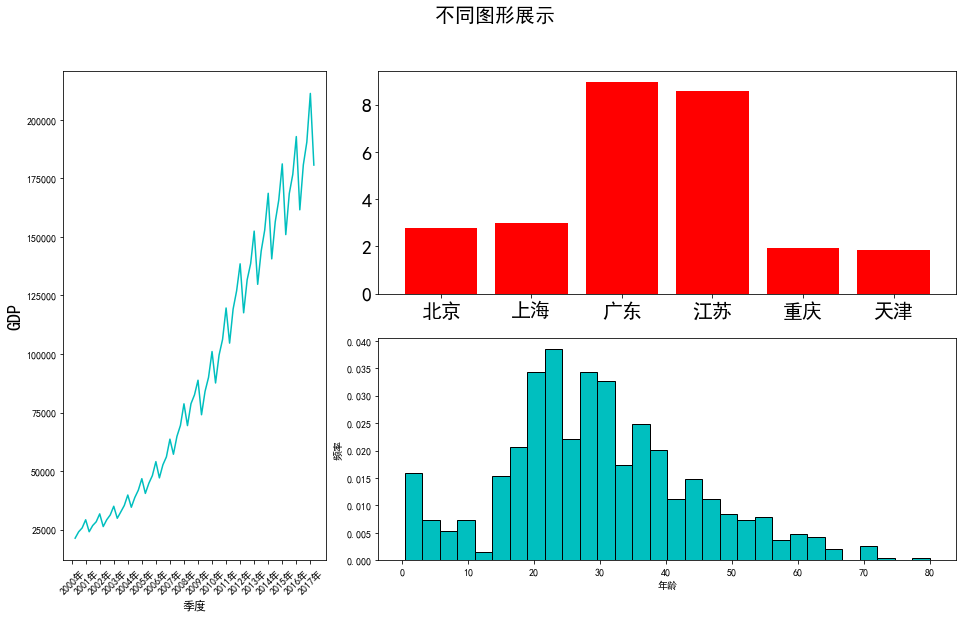

In [83]:
# subplot2grid
plt.figure(figsize=(16,9))
plt.subplot2grid((2,3),     #shape:网格布局，两行三列
                 (0,0),     #loc:图形的位置起点
                 colspan=1, #colspan:占用的列数
                 rowspan=2) #rowspan:占用的行数

plt.plot(data['序号'],
         data['国内生产总值_当季值(亿元)'],
        color='c')
plt.xlabel('季度',fontsize=12)
plt.ylabel('GDP',fontsize=18)
plt.xticks(range(0,70,4),year,rotation=45)

# 第二幅
plt.subplot2grid((2,3),
                (0,1),
                 colspan=2,
                rowspan=1) #占用两列一行
plt.bar(x=gdp.Province,
        height=gdp.GDP,
       color='r')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# 第三幅
plt.subplot2grid((2,3),
                (1,1),
                 colspan=2,
                rowspan=1) #占用两列一行
plt.hist(x=titanic['Age'],
        bins=30,
        color='c',
        edgecolor='black',
        density=True) #density:以频率显示
plt.xlabel('年龄') #fontsize:字体大小，labelpad:距离
plt.ylabel('频率')

# suptitle:字幕
plt.suptitle('不同图形展示',size=20)
plt.show()